In [18]:
import pandas as pd
import numpy as np

df = pd.read_csv('Mall_Customers.csv')

In [2]:
df.describe()

,ID,Age,Income,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [3]:
df['Income'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Income, dtype: float64

In [20]:
df1 = df.groupby(["Gender"])['SpendingScore'].agg(['mean'])
df1

,mean
Gender,
Female,51.526786
Male,48.511364


<AxesSubplot:xlabel='Income', ylabel='SpendingScore'>

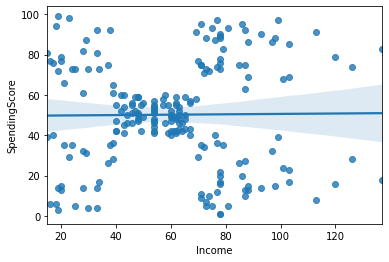

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(x="Income", y='SpendingScore', data = df)

In [6]:
X = df[['Income','SpendingScore']]
X

,Income,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [7]:
from sklearn.cluster import KMeans

SSE = []

In [8]:
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

C:\Users\Yash\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


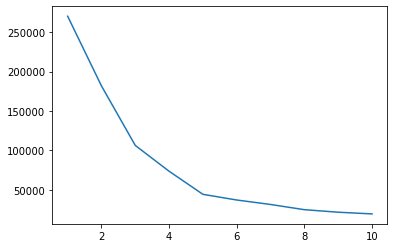

In [9]:
plt.plot(range(1,11),SSE)

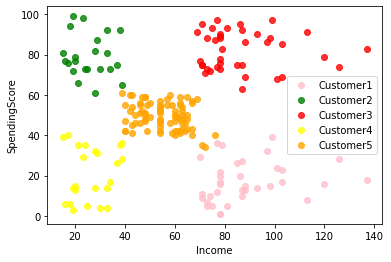

In [37]:
kmeansmodel = KMeans(n_clusters = 5,init='k-means++')
predictions = kmeansmodel.fit_predict(X)

df['cluster'] = predictions
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]

# fig, axs = plt.subplots(2)
sns.regplot(x='Income',y='SpendingScore',data=df1, color='pink', fit_reg = False, label = 'Customer1')
sns.regplot(x='Income',y='SpendingScore',data=df2, color='green', fit_reg = False, label = 'Customer2')
sns.regplot(x='Income',y='SpendingScore',data=df3, color='red', fit_reg = False, label = 'Customer3')
sns.regplot(x='Income',y='SpendingScore',data=df4, color='yellow', fit_reg = False, label = 'Customer4')
sns.regplot(x='Income',y='SpendingScore',data=df5, color='orange', fit_reg = False,label = 'Customer5')
# plt.scatter(df1.Income,df1.SpendingScore,c='pink',label = 'Customer1')
# plt.scatter(df2.Income,df2.SpendingScore,c='green', label = 'Customer2' )
# plt.scatter(df3.Income,df3.SpendingScore, c='red', label = 'Customer3')
# plt.scatter(df4.Income,df4.SpendingScore, c='yellow', label = 'Customer4')
# plt.scatter(df5.Income,df5.SpendingScore, c='orange', label = 'Customer5')

plt.legend()
plt.savefig('Income.pdf')

In [11]:
df.groupby('cluster')['ID'].agg('count')

cluster
0    39
1    81
2    22
3    35
4    23
Name: ID, dtype: int64

In [12]:
X1 = df[['Age','SpendingScore']]
X1

,Age,SpendingScore
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [13]:
SSE1 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init='k-means++')
    kmeans.fit(X1)
    SSE1.append(kmeans.inertia_)

C:\Users\Yash\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


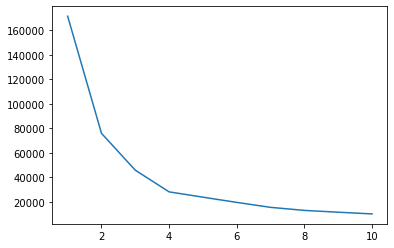

In [14]:
plt.plot(range(1,11),SSE1)

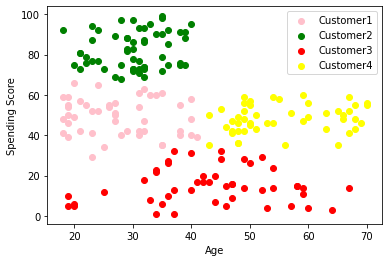

In [38]:
kmeansmodel = KMeans(n_clusters = 4,init='k-means++')
predictions_ = kmeansmodel.fit_predict(X1)

df['cluster_'] = predictions_
df1_ = df[df.cluster_==0]
df2_ = df[df.cluster_==1]
df3_ = df[df.cluster_==2]
df4_ = df[df.cluster_==3]

# fig, axs = plt.subplots(2)
plt.scatter(df1_.Age,df1_.SpendingScore,c='pink',label = 'Customer1')
plt.scatter(df2_.Age,df2_.SpendingScore,c='green', label = 'Customer2' )
plt.scatter(df3_.Age,df3_.SpendingScore, c='red', label = 'Customer3')
plt.scatter(df4_.Age,df4_.SpendingScore, c='yellow', label = 'Customer4')

plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.savefig('Age.pdf')

In [16]:
df.groupby('cluster_')['ID'].agg('count')

cluster_
0    48
1    57
2    47
3    48
Name: ID, dtype: int64